In [69]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import sys
import logging

In [83]:
def perceptron(points, start_point=0, max_iters=sys.maxsize):
    theta = np.zeros(len(points[0][0]))
    theta0 = 0

    mistakes_on_points = {}
    for (x, y) in points:
        mistakes_on_points[tuple(x)] = 0

    for t in range(max_iters):
        mistakes = 0
        for (x, y) in points[start_point:]+points[:start_point]:
            if y*(theta@x + theta0) <= 0:
                theta += y*x
                theta0 += y
                mistakes = mistakes + 1
                mistakes_on_points[tuple(x)] += 1
                logging.debug(f"  x={x}, y={y}, \ttheta={theta}, theta0={theta0}")
        if mistakes == 0:
            logging.debug(f"No more updates in last iteration {t}\n")
            break
        else:
            logging.debug(f"Perceptron mistakes {mistakes} in iteration {t}")

    return theta, theta0, mistakes_on_points

In [84]:
X = np.array([[0, 0],[2, 0],[3,0],[0,2],[2,2],[5,1],[5,2],[2,4],[4,4],[5,5]])
y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]).reshape(-1,1)

mistakes = np.array([1, 9, 10, 5, 9, 11, 0, 3, 1, 1]).reshape(-1, 1)

In [85]:
theta0 = np.multiply(y, mistakes).sum()

yx = np.multiply(y, X)
theta = np.multiply(yx, mistakes).sum(axis=0)

print(f'theta0 = {theta0}, theta = {theta}')

theta0 = -18, theta = [4 4]


In [86]:
clf = svm.SVC(kernel='linear', C=1000).fit(X, y)
print(f'theta0 = {clf.intercept_}, theta = {clf.coef_}')

theta0 = [-4.9990625], theta = [[0.9996875 1.       ]]


C:\Users\makar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


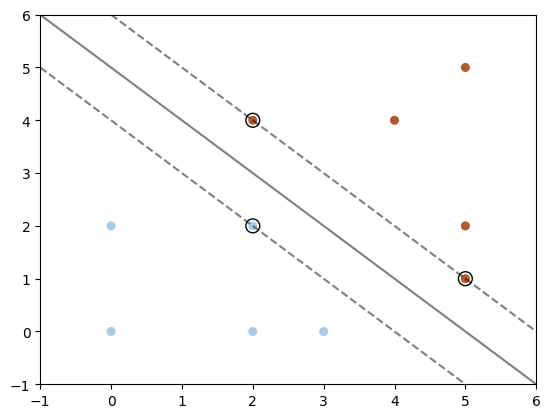

In [87]:
from sklearn.inspection import DecisionBoundaryDisplay

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

In [88]:
theta_mms, theta0_mms = np.round(clf.coef_), np.round(clf.intercept_)

print(f'theta0_mms = {theta0_mms}, theta_mms = {theta_mms}, margin = {1./np.linalg.norm(theta_mms)}')

theta0_mms = [-5.], theta_mms = [[1. 1.]], margin = 0.7071067811865475


In [89]:
print(f'hinge loss = {np.maximum(0, 1-np.multiply(y, (theta_mms@X.T + theta0_mms).T)).sum()}')

hinge loss = 0.0


In [90]:
theta_mms_prime = theta_mms/2
theta0_mms_prime = theta0_mms/2

print(f'hinge loss prime = {np.maximum(0, 1-np.multiply(y, (theta_mms_prime@X.T + theta0_mms_prime).T)).sum()}')

hinge loss prime = 1.5


### Problem 2 Kernel Methods

In [91]:
X = np.array([[0, 0],[2, 0],[1,1],[0,2],[3,3],[4,1],[5,2],[1,4],[4,4],[5,5]])
y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]).reshape(-1,1)

mistakes = np.array([1, 65, 11, 31, 72, 30, 0, 21, 4, 15]).reshape(-1, 1)

In [92]:
phi_X = np.array([np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2]) for x in X])

In [93]:
theta0 = np.multiply(y, mistakes).sum()

yx = np.multiply(y, phi_X)
theta = np.multiply(yx, mistakes).sum(axis=0)

print(f'theta0 = {theta0}, theta = {theta}')

theta0 = -110, theta = [ 21.       -22.627417  22.      ]


In [101]:
clf = svm.SVC(kernel='linear', C=1000).fit(phi_X, y.reshape(-1,))
print(f'theta0 = {clf.intercept_}, theta = {clf.coef_}')

theta0 = [-3.56981368], theta = [[ 0.38079843 -0.33657884  0.38079843]]


In [102]:
print(f'hinge loss = {np.maximum(0, 1-np.multiply(y, (theta@phi_X.T + theta0).T)).sum()}')

hinge loss = 4954.999999999958


In [103]:
points = [(x, y) for x, y in zip(phi_X, y)]

theta, theta0, mistakes_on_points = perceptron(points, start_point=9)
print(f'theta0 = {theta0}, theta = {theta}')

print(f'hinge loss = {np.maximum(0, 1-np.multiply(y, (theta@phi_X.T + theta0).T)).sum()}')

theta0 = [-113], theta = [ 21.         -25.45584412  27.        ]
hinge loss = 4954.999999999958
